<b>Detecção de Anomalias</b>

Neste estudo iremos utilizar duas técnicas distintas para detectar anomalias e comparar o desempenho de ambas.
Inicialmente iremos utilizar o boxplot para entender o conceito de anomalias e posteriormente usaremos a biblioteca AnomalyDetection, desenvolvida para o Twitter. 

In [3]:
#devtools::install_github("twitter/AnomalyDetection", dependencies = FALSE)
#install.packages("hrbrthemes")

In [4]:
library(AnomalyDetection)
library(quantmod)
library(ggplot2)
library(hrbrthemes)

Warning message:
"package 'quantmod' was built under R version 3.6.3"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Warning message:
"package 'TTR' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'hrbrthemes' was built under R version 3.6.3"
NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



Será utilizada a base de dados <i>iris</i> para a primeira análise. Essa base contém características de três espécies de flor e é útil para testar modelos de classificação.

[1] "Rápida visualização"


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


[1] "Gráfico Boxplot"


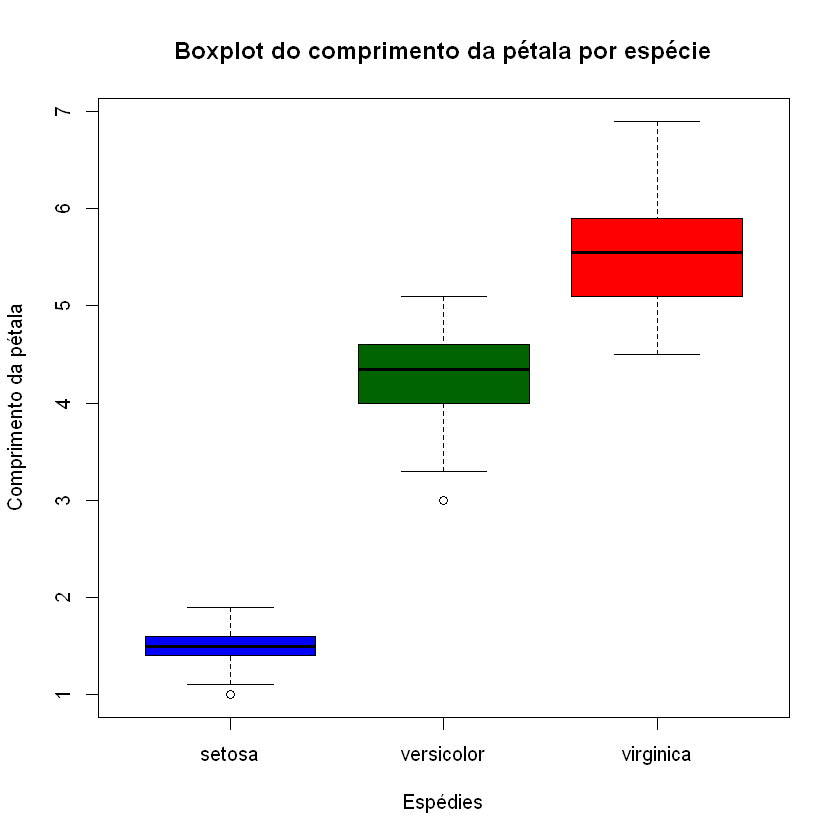

In [5]:
#Um outlier são os pontos menores que Q1-1,5 x IQR ou maiores que Q3+1,5 x IQR, onde IQR é Q3-Q1

#Boxplot
base_iris <- data.frame(iris)

print("Rápida visualização")
head(base_iris)

print("Gráfico Boxplot")
boxplot(base_iris$Petal.Length ~ base_iris$Species
       , col=(c("blue","darkgreen","red"))
       , main="Boxplot do comprimento da pétala por espécie"
       , xlab="Espédies", ylab="Comprimento da pétala")

Imediatamente podemos perceber que as flores, quando analisadas em função do comprimento das pétalas, apresentam uma diferenciação clara. Abaixo veremos melhor porque isso fica claro.

[1] "Outliers - Anomalias"


$stats
[1] 2.2 2.8 3.0 3.3 4.0

$n
[1] 150

$conf
[1] 2.935497 3.064503

$out
[1] 4.4 4.1 4.2 2.0

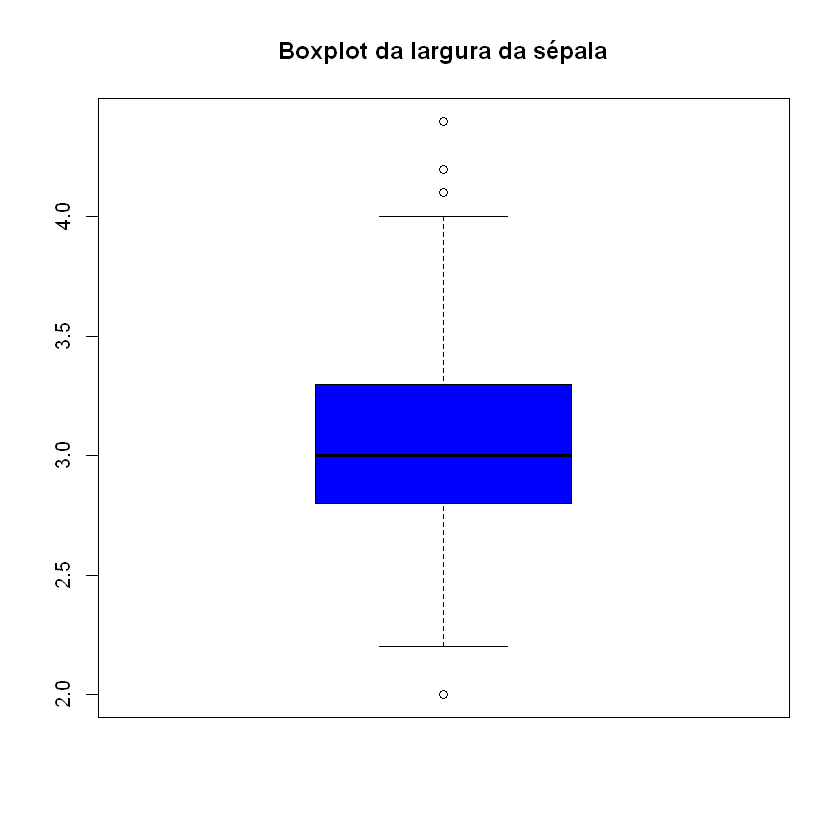

In [6]:
#Analisando uma característica específica

sepala_largura <- base_iris[,2]

boxplot(sepala_largura
       , main="Boxplot da largura da sépala"
       , col="blue")

print("Outliers - Anomalias")
boxplot.stats(sepala_largura)

Na variável $stats acima temos apresentados 5 valores. Estes são os valores característicos do boxplot. <br>
O primeiro valor (2.2) é o valor mínimo, corresponde ao menor valor que não é um outlier. <br>
O segundo valor (2.8) é o primeiro quartil, o primeiro quartil é o valor que separa os primeiros 25% dos valores da base.<br>
O terceiro valor (3) é a mediana, a mediana é o valor que separa a base pela metade, ou seja, 50% dos dados estão acima da mediana e 50% dos dados abaixo dela.<br>
O quarto valor (3.3) é o terceiro quartil, que separa os últimos 25% valores dos primeiros 75% valores da base.<br>
O quinto valor (4) é o valor máximo, corresponde ao maior valor que não é um outlier.<br>

<b>Mas afinal o que é um outlier? </b>

Para o boxplot, os outliers (as bolinhas brancas no gráfico acima) são os valores que ultrapassam mais de 150% do valor interquartil abaixo do primeiro quartil e acima do terceiro quartil. Vish, complicado, vamos explicar por partes. O valor interquartil é a diferença entre o primeiro e o terceiro quartis, nesse caso a diferença entre 3,3-2,8 = 0,5, ou seja, é o tamanho do corpo do boxplot. Portanto, 150% do intervalo interquartil é 1,5*0,5 = 0,75. Assim um outlier é todo valor abaixo de 2,8-0,75 = 2,05 e acima de 3,3+0,75 = 4,05.

In [7]:
##Fazendo análise de anomalias com a biblioteca do Twitter

#library(anomalyDetection)
#library(hrbrthemes)

In [8]:
getwd()

[1] "C:/Users/andre/Google Drive/Work/OMNP/Data Science"

In [9]:
setwd('Dados')

In [10]:
# Olhando os dados fornecidos pelo Twitter

load('raw_data.rda')
head(raw_data)
str(raw_data)

timestamp,count
1980-09-25 14:01:00,182.478
1980-09-25 14:02:00,176.231
1980-09-25 14:03:00,183.917
1980-09-25 14:04:00,177.798
1980-09-25 14:05:00,165.469
1980-09-25 14:06:00,181.878


'data.frame':	14398 obs. of  2 variables:
 $ timestamp: POSIXlt, format: "1980-09-25 14:01:00" "1980-09-25 14:02:00" ...
 $ count    : num  182 176 184 178 165 ...


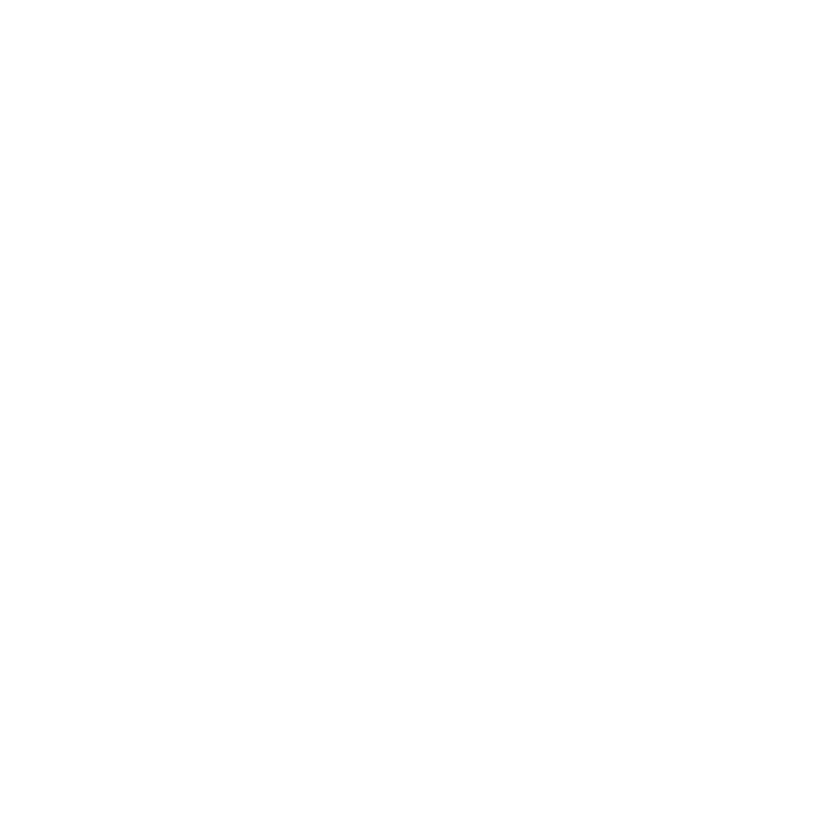

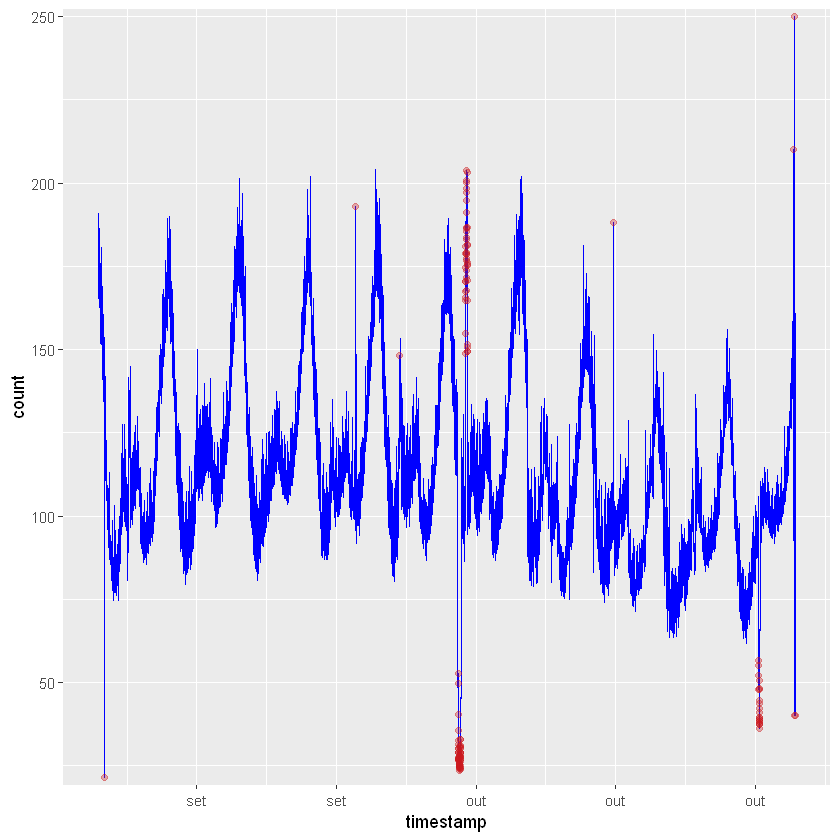

In [11]:
res <- AnomalyDetectionTs(raw_data, max_anoms=0.01, direction="both")

#for ggplot2
raw_data$timestamp <- as.POSIXct(raw_data$timestamp)
res$anoms$timestamp <- as.POSIXct(res$anoms$timestamp)

ggplot() +
geom_line(
    data=raw_data, aes(x=timestamp, y=count),
    size=0.125, color="blue"
    ) +
geom_point(
    data=res$anoms, aes(timestamp, anoms), color="#cb181d", alpha=1/3
    ) + 
scale_x_datetime(date_labels="%b") +
scale_y_comma()

[1] "Gráfico Boxplot"
[1] "Outliers - Anomalias"


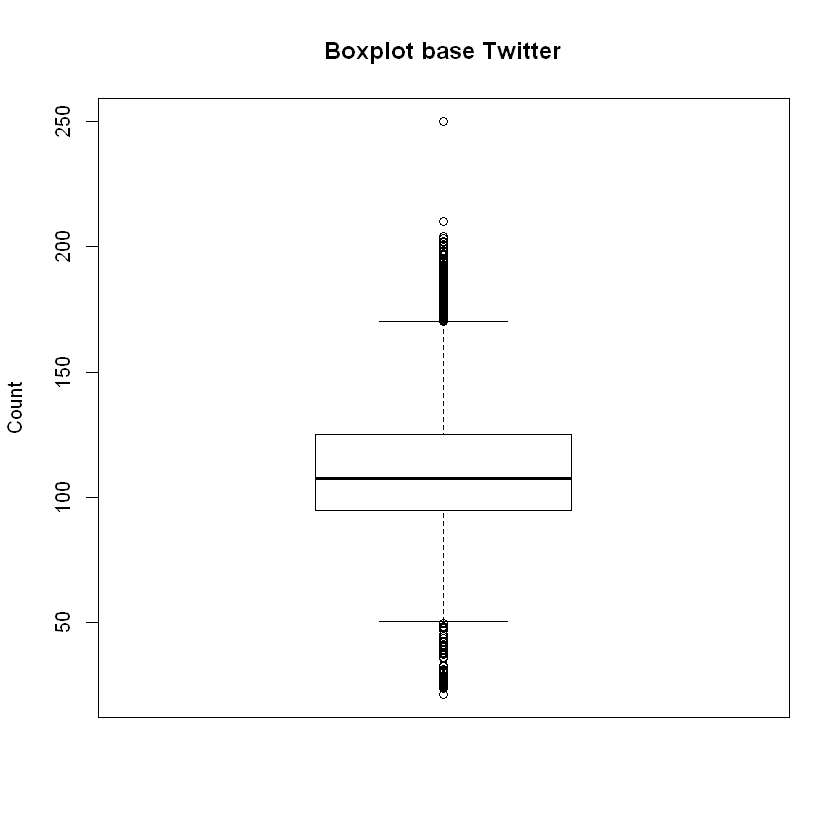

In [12]:
# Fazendo com o boxplot

print("Gráfico Boxplot")
boxplot(raw_data[,2]
       , main = "Boxplot base Twitter"
       , ylab = "Count")

print("Outliers - Anomalias")
out <- boxplot.stats(raw_data[,2])$out

In [13]:
#São técnicas diferentes
length(out)
dim(res$anoms)[1]

[1] 607

[1] 131

Acima temos a detecção de anomalias na base de dados do Twitter. Percebemos que o boxplot detectou 607 anomalias, contra 131 da ferramenta do Twitter. 

In [14]:
#Preparando a base de dados

#Mantenho apenas os valores de out que estao dentro de raw_data - todo o resto recebe 0
aux <- ifelse(raw_data$count %in% out, raw_data$count, 0)

#Cri um novo dataframe para alinhar as datas aos valores de out que foram mantidos
novo_df <- data.frame(timestamp = raw_data$timestamp, out = aux)

#Filrto todos os valores que sao diferente de 0, mas mantenho o timestamp
novo_df <- novo_df [ which(novo_df$out != 0), ]

head(novo_df)

,timestamp,out
1,1980-09-25 14:01:00,182.478
2,1980-09-25 14:02:00,176.231
3,1980-09-25 14:03:00,183.917
4,1980-09-25 14:04:00,177.798
6,1980-09-25 14:06:00,181.878
7,1980-09-25 14:07:00,184.502


<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

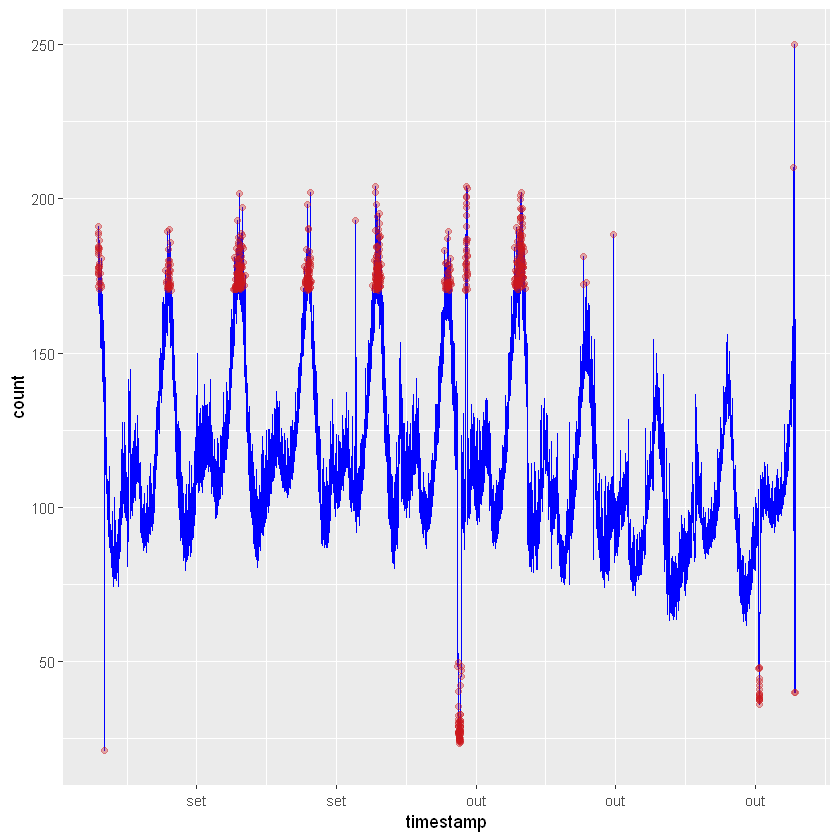

In [15]:
#Grafico com as anomalias da base do Twitter, mas vistas com a técnica boxplot

ggplot() + 
geom_line(
    data=raw_data, aes(timestamp, count),
    size=0.125, color= "blue"
) +
geom_point(
    data=novo_df, aes(timestamp, out), color="#cb181d", alpha=1/3
) + 
scale_x_datetime(date_labels="%b")
scale_y_comma()

<b>Diferença entre os dois métodos</b>

O método do boxplot não consegue diferenciar a sazonalidade dos dados e acaba por detectar anomalias nos picos que correspondem aos finais de semana. A ferramenta do Twitter é mais delicada e, portanto, capaz de levar em conta a variação sazonal dos dados. Essa característica reduz muito a ocorrência de falsos positivos e por consequência o custo operacional do modelo.

<b>Detecção de Anomalias no Mercado Financeiro</b>

In [38]:
#Periodo de Analise
startdate <- as.Date("2001-01-01")
enddate <- as.Date("2021-12-31")

#Selecao de ativos para analise
tickers <- c("^BVSP")

#Captura dos dados
getSymbols(tickers, src="yahoo", from=startdate, to=enddate)

#Renomeando o DF
names(BVSP) <- c("Open", "High", "Low", "Close", "Volume", "Ajustado")
BVSP <- data.frame(BVSP)

Warning message:
"^BVSP contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


[1] "^BVSP"

In [39]:
head(BVSP)

,Open,High,Low,Close,Volume,Ajustado
2001-01-02,15242,15621,15174,15425,0,15425
2001-01-03,15425,16599,15251,16599,0,16599
2001-01-04,16597,16933,16587,16675,0,16675
2001-01-05,16679,16888,16380,16410,0,16410
2001-01-08,16398,16623,16226,16562,0,16562
2001-01-09,16566,17096,16566,16976,0,16976


In [40]:
Date <- rownames(BVSP)

rownames(BVSP) <- NULL

BVSP <- cbind(Date, BVSP)

head(BVSP)

Date,Open,High,Low,Close,Volume,Ajustado
2001-01-02,15242,15621,15174,15425,0,15425
2001-01-03,15425,16599,15251,16599,0,16599
2001-01-04,16597,16933,16587,16675,0,16675
2001-01-05,16679,16888,16380,16410,0,16410
2001-01-08,16398,16623,16226,16562,0,16562
2001-01-09,16566,17096,16566,16976,0,16976


In [41]:
BVSP <- na.omit(BVSP)

sub_bvsp <- BVSP[,c("Date", "Close")]

In [42]:
sub_bvsp$Date <- as.POSIXct(sub_bvsp$Date)

head(sub_bvsp)

Date,Close
2001-01-02,15425
2001-01-03,16599
2001-01-04,16675
2001-01-05,16410
2001-01-08,16562
2001-01-09,16976


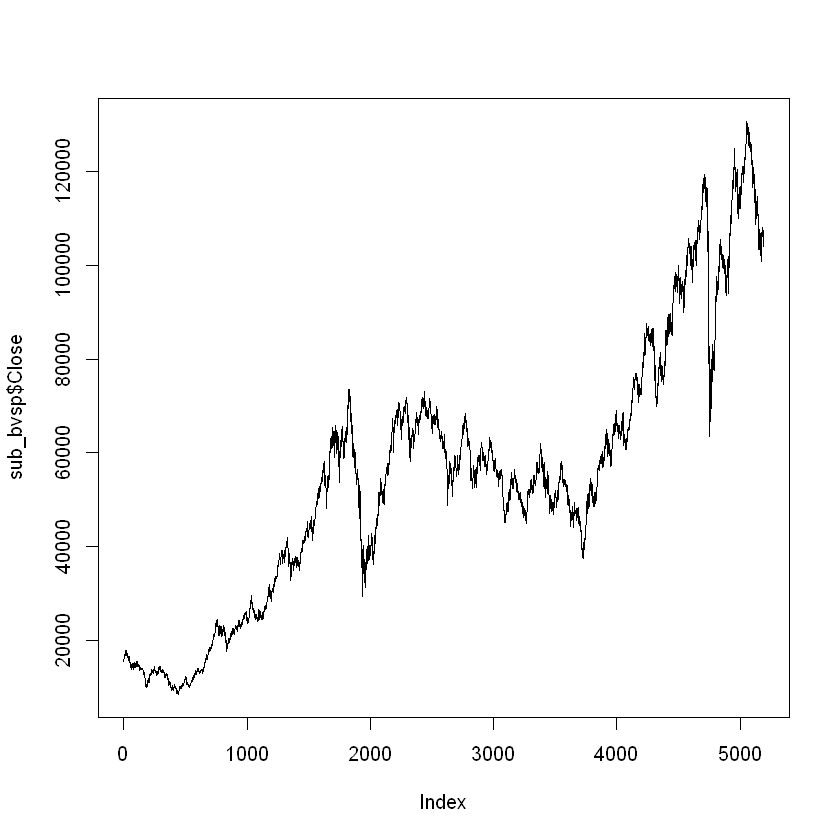

In [43]:
plot(sub_bvsp$Close, type = "l")

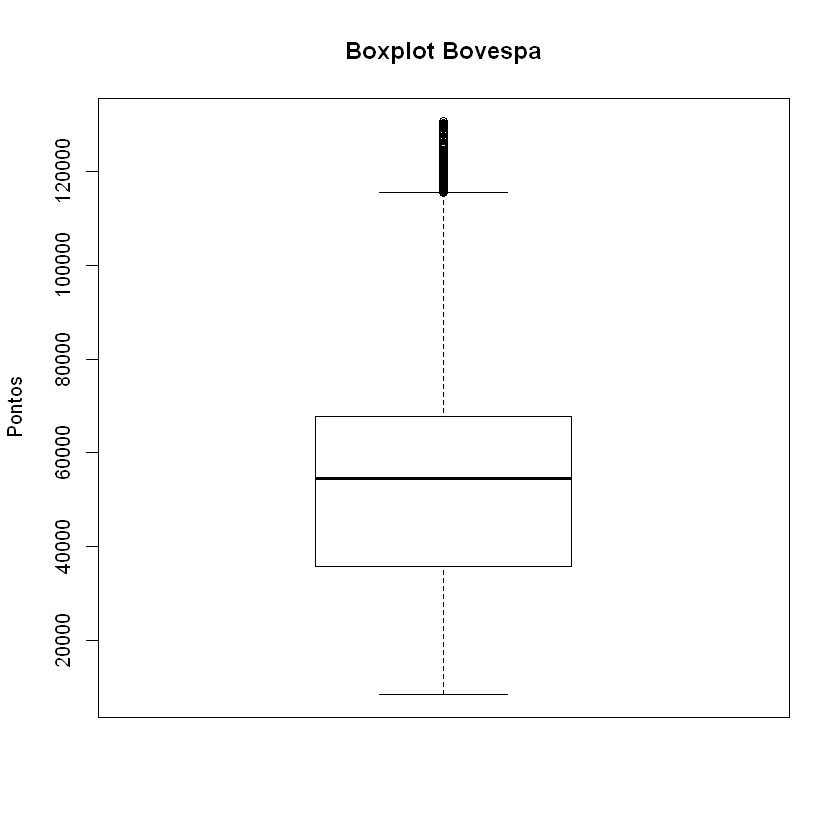

In [44]:
# Existem outliers?

boxplot(sub_bvsp$Close
       , main="Boxplot Bovespa"
       , ylab="Pontos")

List of 2
 $ anoms:'data.frame':	0 obs. of  0 variables
 $ plot : NULL


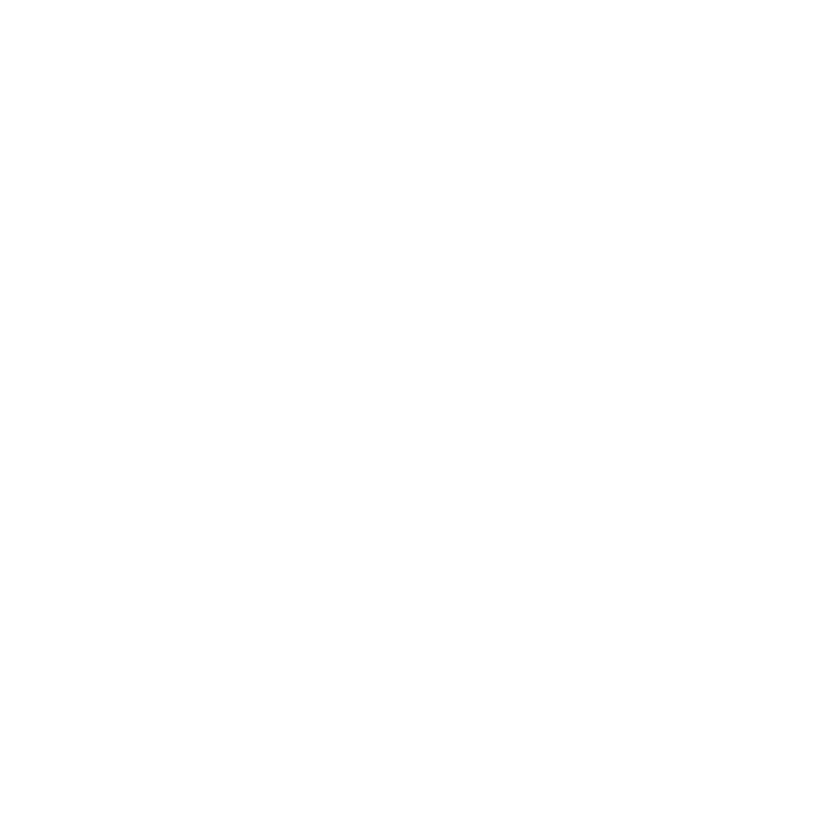

In [45]:
ad_bvsp <- AnomalyDetectionTs(sub_bvsp, max_anoms=0.1, direction = "both", alpha = 0.05)

str(ad_bvsp)

Ao aplicar ambos os métodos temos que o boxplot identificou poucos outliers próximo ao fim da série de dados e a ferramenta do Twitter não detecou nenhum. Assim, para essa análise serão necessárias técnicas mais robustas como, por exemplo, machine learning.